In [ ]:
# Set up packages for lecture. Don't worry about understanding this code, but
# make sure to run it if you're following along.
import numpy as np
import babypandas as bpd
import pandas as pd
from matplotlib_inline.backend_inline import set_matplotlib_formats
import matplotlib.pyplot as plt
set_matplotlib_formats("svg")
plt.style.use('ggplot')

np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option("display.max_rows", 7)
pd.set_option("display.max_columns", 8)
pd.set_option("display.precision", 2)

from IPython.display import display, IFrame

def binning_animation():
    src="https://docs.google.com/presentation/d/e/2PACX-1vTnRGwEnKP2V-Z82DlxW1b1nMb2F0zWyrXIzFSpQx_8Wd3MFaf56y2_u3JrLwZ5SjWmfapL5BJLfsDG/embed?start=false&loop=false&delayms=60000"
    width=900
    height=307
    display(IFrame(src, width, height))

# Lecture 8 – Histograms and Overlaid Plots

## DSC 10, Fall 2022

### Announcements

- Homework 2 is due **tomorrow, 10/11 at 11:59pm**.
- Lab 3 is due on **Saturday, 10/15 at 11:59pm**.
- Discussion section is tonight. Bring a photo ID for attendance credit.
- Optional [extra videos](https://www.youtube.com/playlist?list=PLDNbnocpJUhbczUw2Rw6bqreEECMvZ8gN) to supplement last class:
    - Using `str.contains()`.
    - How line plots work with sorting.

### Agenda

- Distributions.
- Density histograms.
- Overlaid plots.

### Review: types of visualizations

The type of visualization we create depends on the kinds of variables we're visualizing.

- **Scatter plot**: numerical vs. numerical.
    - Example: weight vs. height.
- **Line plot**: sequential numerical (time) vs. numerical.
    - Example: height vs. time.
- **Bar chart**: categorical vs. numerical.
    - Example: heights of different family members.
- **Histogram**: distribution of numerical.
    
**Note:** We may interchange the words "plot", "chart", and "graph"; they all mean the same thing.

### Some bad visualizations

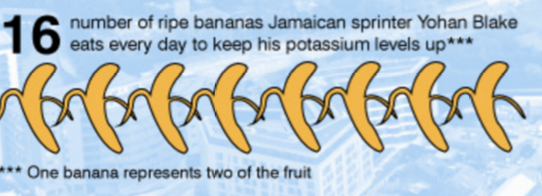


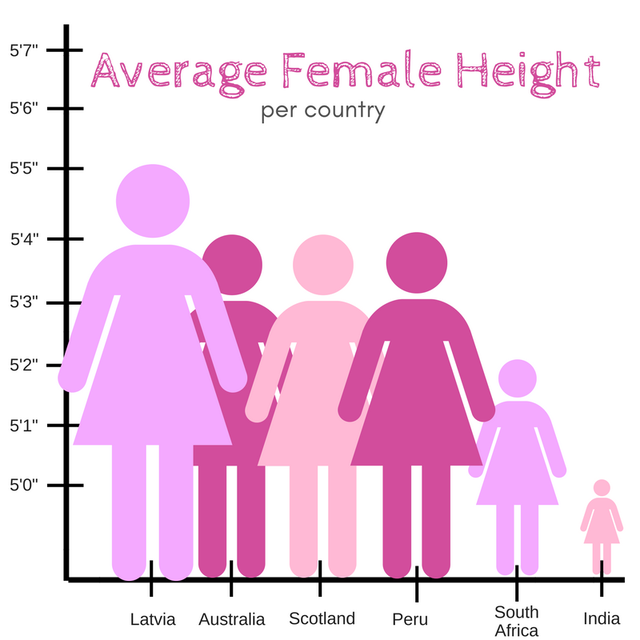

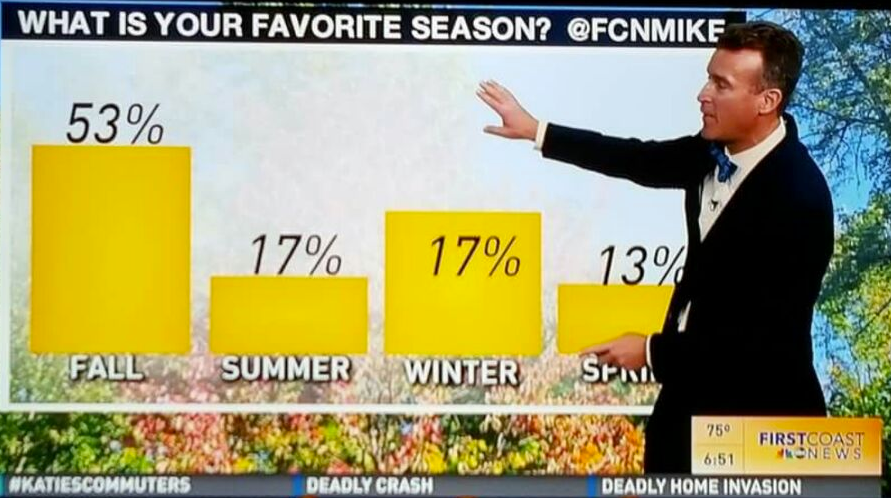

## Distributions

### What is the distribution of a variable?

- The distribution of a variable consists of all values of the variable that occur in the data, along with their frequencies.
- Distributions help you understand:
    > _How often does a variable take on a certain value?_
- Both categorical and numerical variables have distributions.

### Categorical variables

The distribution of a categorical variable can be displayed as a table or bar chart, among other ways! For example, let's look at the colleges of students enrolled in DSC 10 this quarter.

In [ ]:
colleges = bpd.DataFrame().assign(College=['Seventh', 'Sixth', 'Roosevelt', 'Warren', 'Marshall', 'Muir', 'Revelle'], 
                                  Students=[37, 93, 67, 61, 61, 38, 52])
colleges

In [ ]:
colleges.plot(kind='barh', x='College', y='Students');

In [ ]:
colleges.plot(kind='bar', x='College', y='Students');

### Numerical variables

The distribution of a numerical variable cannot always be accurately depicted with a bar chart. For example, let's look at the  number of streams for each of the top 200 songs on Spotify.  🎵

In [ ]:
charts = bpd.read_csv('data/regional-global-daily-2022-10-04.csv')
charts = (charts.set_index('rank')
          .assign(million_streams = np.round(charts.get('streams')/1000000, 2))
          .get(['track_name', 'artist_names', 'streams', 'million_streams'])
         )
charts

To see the distribution of the number of streams, we need to group by the `'million_streams'` column.

In [ ]:
stream_counts = charts.groupby('million_streams').count()
stream_counts = stream_counts.assign(Count=stream_counts.get('track_name')).drop(columns=['track_name', 'artist_names', 'streams'])
stream_counts

In [ ]:
stream_counts.plot(kind='bar', y='Count', figsize=(15,5));

- This obscures the fact that the top song (Unholy) is an outlier with almost 8 million streams, **much more** than the other songs.

- The horizontal axis should be numerical (like a number line), not categorical. There should be more space between certain bars than others.

## Density Histograms

### Density histograms show the distribution of numerical variables

Instead of a bar chart, we'll visualize the distribution of a numerical variable with a **density histogram**. Let's see what a density histogram for `'million_streams'` looks like. What do you notice about this visualization?

In [ ]:
# Ignore the code for right now.
charts.plot(kind='hist', y='million_streams', density=True, bins=np.arange(9), ec='w');

### First key idea behind histograms: binning 🗑️

- Binning is the act of counting the number of numerical values that fall within ranges defined by two endpoints. These ranges are called “bins”.
- A value falls in a bin if it is **greater than or equal to the left** endpoint and **less than the right** endpoint.
    - [a, b): a is included, b is not.
- The width of a bin is its right endpoint minus its left endpoint.


In [ ]:
binning_animation()

### Plotting a density histogram

- **Density histograms** (not bar charts!) visualize the distribution of a single numerical variable by placing numbers into bins.
- To create one from a DataFrame `df`, use
```py
df.plot(
    kind='hist', 
    y=column_name,
    density=True
)
```
- Optional but recommended: Use `ec='w'` to see where bins start and end more clearly.

### Customizing the bins

- By default, Python will bin your data into 10 equally sized bins.
- You can specify another number of equally sized bins by setting the optional argument `bins` equal to some other integer value.
- You can also specify custom bin start and endpoints by setting `bins` equal to a sequence of bin endpoints.
    - Can be a `list` or `numpy` array.

In [ ]:
# There are 10 bins by default, some of which are empty.

charts.plot(kind='hist', y='million_streams', density=True, ec='w');

In [ ]:
charts.plot(kind='hist', y='million_streams', density=True, bins=20, ec='w');

In [ ]:
charts.plot(kind='hist', y='million_streams', density=True,
            bins=[0, 2, 4, 6, 8],
            ec='w');

In the three histograms above, what is different and what is the same?

### Observations
- The general shape of all three histograms is the same, regardless of the bins. This shape is called *right-skewed*.
- More bins gives a finer, more granular picture of the distribution of the variable `'million_streams'`.
- The $y$-axis values seem to change a lot when we change the bins. Hang onto that thought; we'll see why shortly.

### Bin details

- In a histogram, only the last bin is inclusive of the right endpoint!
- The bins you specify need not include all data values. Data values not in any bin won't be shown in the histogram.
- For equally sized bins, use `np.arange`.
    - Be **very careful** with the endpoints. Example: `bins=np.arange(4)` creates the bins [0, 1), [1, 2), [2, 3].
- Bins need not be equally sized.

In [ ]:
charts.plot(kind='hist', y='million_streams', density=True,
            bins=np.arange(8),
            ec='w');

The outlier (Unholy) is not included because the rightmost bin is [6,7].

In [ ]:
charts.plot(kind='hist', y='million_streams', density=True,
            bins=[0, 1.5, 2, 4, 8],
            ec='w');

### Second key idea behind histograms: total area is 1

- In a density histogram, the $y$-axis can be hard to interpret, but it's designed to give the histogram a very nice property: $$\textbf{The bars of a density histogram }$$
$$\textbf{have a combined total area of 1.}$$
- This means the area of a bar is equal to the proportion of all data points that fall into that bin.
- Proportions and percentages represent the same thing.
    - A proportion is a decimal between 0 and 1, a percentage is between 0\% and 100\%.
    - The proportion 0.34 means 34\%.


### How to calculate heights in a density histogram

Since a bar of a histogram is a rectangle, its area is given by

$$\text{Area} = \text{Height} \times \text{Width}$$

That means

$$\text{Height} = \frac{\text{Area}}{\text{Width}} = \frac{\text{Proportion (or Percentage)}}{\text{Width}}$$

This implies that the units for height are "proportion per ($x$-axis unit)". The $y$-axis represents a sort of *density*, which is why we call it a density histogram.

### Example calculation

In [ ]:
charts.plot(kind='hist', y='million_streams', density=True,
            bins=[0, 1.5, 2, 4, 8],
            ec='w');

- The $y$-axis units here are "proportion per million streams", since the $x$-axis represents millions of streams.
  - Unfortunately, the $y$-axis units on the histogram always displays as "Frequency". **This is wrong!**
  - Can fix with `plt.ylabel(...)` but we usually don't.
- Based on this histogram, what proportion of the top 200 songs had between 1.5 and 2 million streams?

### Example calculation

- The height of the [1.5, 2) bar looks to be around 0.25.
    - Interpretation: 0.25 per million streams, or 25% per million streams.
- The width of the bin is 2 - 1.5 = 0.5 million streams.

- Therefore

$$\begin{align}\text{Area} &= \text{Height} \times \text{Width} \\ &= 0.25 \text{ per million streams} \times 0.5 \text{ million streams} \\ &= 0.125
\end{align}$$

- Since areas represent proportions, this means that the proportion of top 200 songs with 1.5 to 2 million streams was roughly 0.125 (12.5\%).

### Check the math

In [ ]:
between = charts[(charts.get('million_streams') >= 1.5) &
                 (charts.get('million_streams') < 2)].shape[0]
between

In [ ]:
between/200

This matches the result we got. (Not exactly, since we made a rough guess for the height.)

### Concept Check ✅ – Answer at [cc.dsc10.com](http://cc.dsc10.com) 

Suppose we created a density histogram of people's shoe sizes. 👟 Below are the bins we chose along with their heights.

| Bin | Height of Bar |
| --- | --- |
| [3, 7) | 0.05 |
| [7, 10) | 0.1 |
| [10, 12) | 0.15 |
| [12, 16] | $X$ |


What should the value of $X$ be so that this is a valid histogram?

A. 0.02 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 
B. 0.05 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
C. 0.2 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
D. 0.5 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
E. 0.7 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;


### Bar charts vs. histograms

Bar Chart | Histogram
---|---
Shows the distribution of a categorical variable | Shows the distribution of a numerical variable
1 categorical axis,  1 numerical axis | 2 numerical axes
Bars have arbitrary, but equal, widths and spacing | Horizontal axis is numerical and to scale
Lengths of bars are proportional to the numerical quantity of interest | Height measures density; areas are proportional to the proportion (percent) of individuals

### 🌟 Important 🌟

In this class, **"histogram" will always mean a "density histogram".** We will **only** use density histograms. 

*Note:* It's possible to create what's called a *frequency histogram* where the $y$-axis simply represents a count of the number of values in each bin. While easier to interpret, frequency histograms don't have the important property that the total area is 1, so they can't be connected to probability in the same way that density histograms can. That makes them far less useful for data scientists. 

## Overlaid plots

### New dataset: populations of San Diego and San Jose over time

The data for both cities comes from [macrotrends.net](https://www.macrotrends.net/cities/23129/san-diego/population).

In [ ]:
population = bpd.read_csv('data/sd-sj-2022.csv').set_index('date')
population

### Recall: line plots

In [ ]:
population.plot(kind='line', y='Growth SD', 
                title='San Diego population growth rate', legend=False);

In [ ]:
population.plot(kind='line', y='Growth SJ', 
                title='San Jose population growth rate', legend=False);

Notice the optional `title` and `legend` arguments. Some other useful optional arguments are `figsize`, `xlabel`, and `ylabel`. There are [many optional arguments](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html).

### Overlaying plots

If `y=column_name` is omitted, **all** columns are plotted!

In [ ]:
population.plot(kind='line');

Why are there only three lines shown, but four in the legend? 🤔

### Selecting multiple columns at once
- To select multiple columns, use `.get([column_1, ..., column_k])`.
- Passing a `list` of column labels to `.get` returns a DataFrame.
    - `.get([column_name])` will return a DataFrame with just one column!

In [ ]:
growths = population.get(['Growth SD', 'Growth SJ'])
growths

In [ ]:
growths.plot(kind='line');

### To plot multiple graphs at once:
* `.get` only the columns that contain information relevant to your plot.
    * Equivalently, `.drop` all extraneous columns.
* Specify the column for the $x$-axis (if not the index) in `.plot(x=column_name)`.
* Omit the `y` argument. Then **all** other columns will be plotted on a shared $y$-axis.

The same thing works for `'barh'`, `'bar'`, and `'hist'`, but not `'scatter'`.

### New dataset: heights of children and their parents 👪 📏

- This data was collected in the 1880s by Francis Galton, a eugenicist and the creator of linear regression.
    - We will revisit this dataset later on in the course.
- We only need the `'mother'`, and `'childHeight'` columns for now.

In [ ]:
mother_child = (bpd.read_csv('data/galton.csv')
           .get(['mother', 'childHeight']))
mother_child

### Plotting overlaid histograms

`alpha` controls how transparent the bars are (`alpha=1` is opaque, `alpha=0` is transparent).

In [ ]:
height_bins = np.arange(55, 80, 2.5)
mother_child.plot(kind='hist', density=True, ec='w',
             alpha=0.65, bins=height_bins);

Why do children seem so much taller than their mothers?

### Extra Practice

Try to answer these questions based on the overlaid histogram.

1. What proportion of children were between 70 and 75 inches tall?

2. What proportion of mothers were between 60 and 63 inches tall?

<h3>Answers</h3>
<details>
<summary>Click here to show.</summary>
    
<b>Question 1</b>
    
The height of the $[70, 72.5)$ bar is around $0.08$, meaning that $0.08 \cdot 2.5 = 0.2$ of children had heights in that interval. The height of the $[72.5, 75)$ bar is around $0.02$, meaning $0.02 \cdot 2.5 = 0.05$ of children had heights in that interval. Thus, the overall proportion of children who were between $70$ and $75$ inches tall was around $0.20 + 0.05 = 0.25$, or $25\%$.
    
To verify our answer, we can run

<code>heights[(heights.get('childHeight') >= 70) & (heights.get('childHeight') < 75)].shape[0] / heights.shape[0]</code>
    
<b>Question 2</b>
    
We can't tell. We could try and breaking it up into the proportion of mothers in $[60, 62.5)$ and $[62.5, 63)$, but we don't know the latter. In the absence of any additional information, we can't infer about the distribution of values within a bin. For example, it could be that everyone in the interval $[62.5, 65)$ actually falls in the interval  $[62.5, 63)$ - or it could be that no one does!

</details>

## Summary, next time

### Summary

- Histograms (not bar charts!) are used to display the distribution of a numerical variable.
- We will always use density histograms.
    - In a density histograms, the area of a bar represents the proportion (percentage) of values within its bin.
    - The total area of all bars is 1 (100%).
- We can overlay multiple line plots, bar charts, and histograms on top of one another to look at multiple relationships or distributions.

### Next time

- More advanced DataFrame manipulations.
- Writing our own functions.